In [48]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [49]:
#read dateset
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Delete missing values

In [52]:
df = df.dropna()

### Кількісні дані

In [53]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Категоріальні дані

In [54]:
df[['Education', 'Marital_Status', 'Dt_Customer']].describe()

,Education,Marital_Status,Dt_Customer
count,2216,2216,2216
unique,5,8,662
top,Graduation,Married,31-08-2012
freq,1116,857,12


### Adding Feature

In [55]:
#Age of the client
df['Age'] = 2015 - df['Year_Birth']

In [56]:
#number of children
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [57]:
#parents or not
df["Parent"] = np.where(df.Kids> 0, 1, 0)

In [58]:
#how many days client is registered in the company
last_enrollment = pd.to_datetime(df['Dt_Customer']).max()
df['Days_Enrolled'] = (last_enrollment - pd.to_datetime(df['Dt_Customer'])).dt.days

In [59]:
#rename columns
df = df.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat",
                        "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [60]:
#total spend
df['Spend_all'] = df["Wines"] + df["Fruits"] + df["Meat"] + df["Fish"] \
                    + df["Sweets"] + df["Gold"]

In [61]:
df['CouponsAccepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] \
                    + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [62]:
#or the client has a partner
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Partner",
                                           "Together":"Partner",
                                           "Single":"Alone",
                                           "Divorced":"Alone",   
                                           "Widow":"Alone",
                                           "Alone":"Alone",
                                           "Absurd":"Alone",
                                           "YOLO":"Alone"})

In [63]:
#number of purchases
df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['NumAllPurchases'] = df['NumAllPurchases'].replace({0: df['NumAllPurchases'].mean()})

In [64]:
# average client check
df['AverageCheck'] = round(df['Spend_all'] / df['NumAllPurchases'], 1)

In [65]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Age,Kids,Parent,Days_Enrolled,Spend_all,CouponsAccepted,NumAllPurchases,AverageCheck
0,5524,1957,Graduation,Alone,58138.0,0,0,04-09-2012,58,635,...,11,1,58,0,0,971,1617,1,22.0,73.5
1,2174,1954,Graduation,Alone,46344.0,1,1,08-03-2014,38,11,...,11,0,61,2,1,125,27,0,4.0,6.8
2,4141,1965,Graduation,Partner,71613.0,0,0,21-08-2013,26,426,...,11,0,50,0,0,472,776,0,20.0,38.8
3,6182,1984,Graduation,Partner,26646.0,1,0,10-02-2014,26,11,...,11,0,31,1,1,65,53,0,6.0,8.8
4,5324,1981,PhD,Partner,58293.0,1,0,19-01-2014,94,173,...,11,0,34,1,1,321,422,0,14.0,30.1


In [66]:
df = df.drop(['Year_Birth', 'Kidhome', 'Teenhome'], axis = 1)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

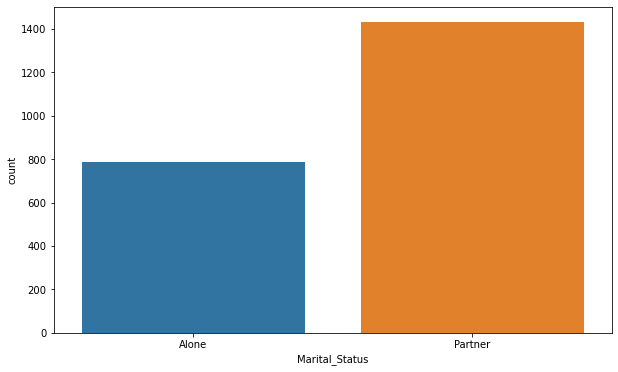

In [67]:
#Marital_Status/count
plt.figure(figsize=(10, 6))
sns.countplot(x="Marital_Status", data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

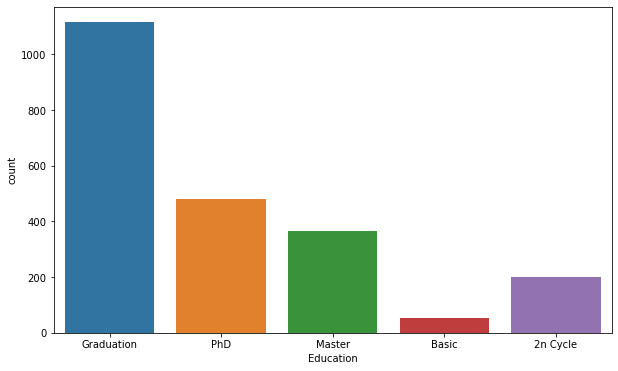

In [68]:
#Education/count
plt.figure(figsize=(10, 6))
sns.countplot(x="Education", data=df)

### Box Plot to check for outliers

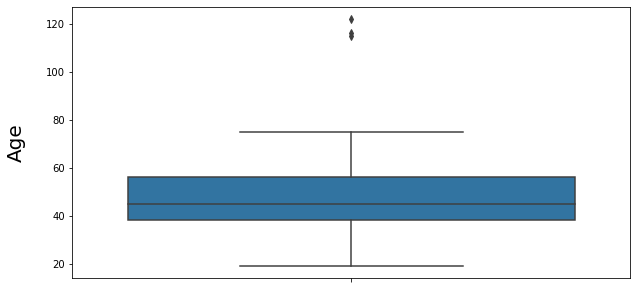

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

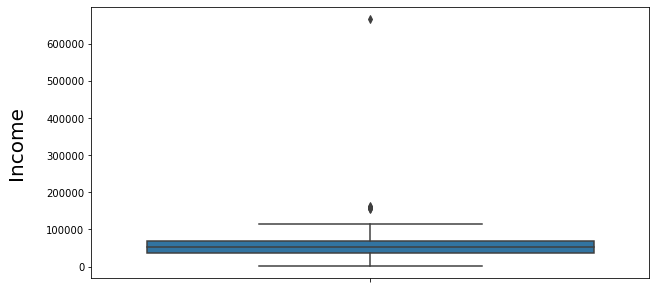

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

In [71]:
#delete outliers
df = df[(df['Age'] < 80) & (df['Income'] < 140000)]

In [72]:
#age frame
df.loc[df['Age'] < 30, 'AgeGroup'] = '[0, 30]'
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'AgeGroup'] = '[30, 40]'
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'AgeGroup'] = '[40, 50]'
df.loc[(df['Age'] >= 50) & (df['Age'] < 60), 'AgeGroup'] = '[50, 60]'
df.loc[(df['Age'] >= 60) & (df['Age'] < 70), 'AgeGroup'] = '[60, 70]'
df.loc[(df['Age'] >= 70) & (df['Age'] < 80), 'AgeGroup'] = '[70, 80]'

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

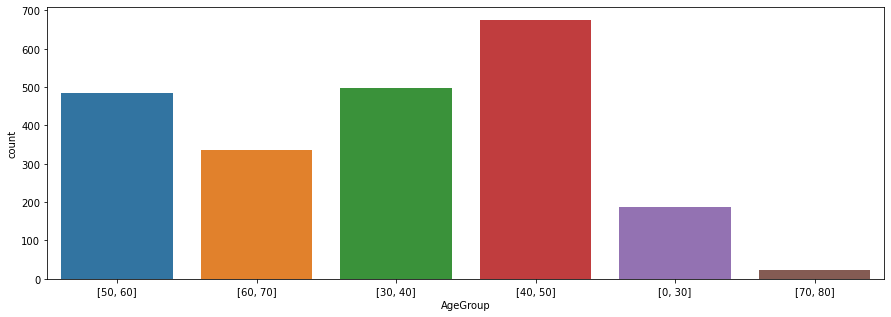

In [73]:
plt.figure(figsize=(15, 5))
sns.countplot(x='AgeGroup', data=df)

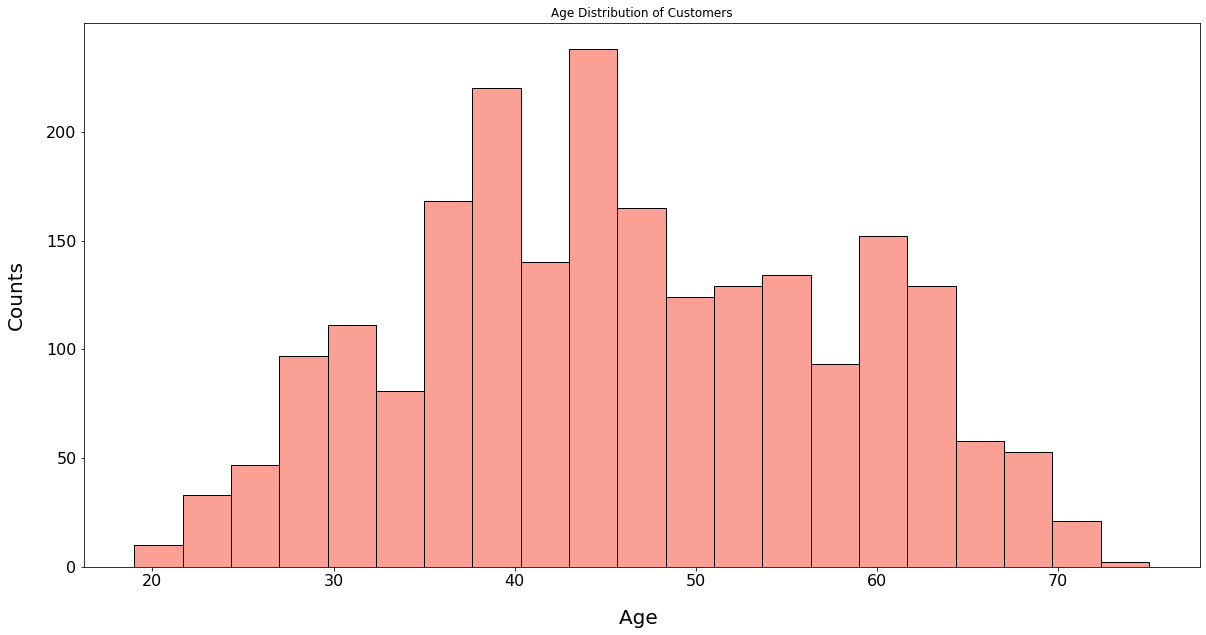

In [74]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data = df.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

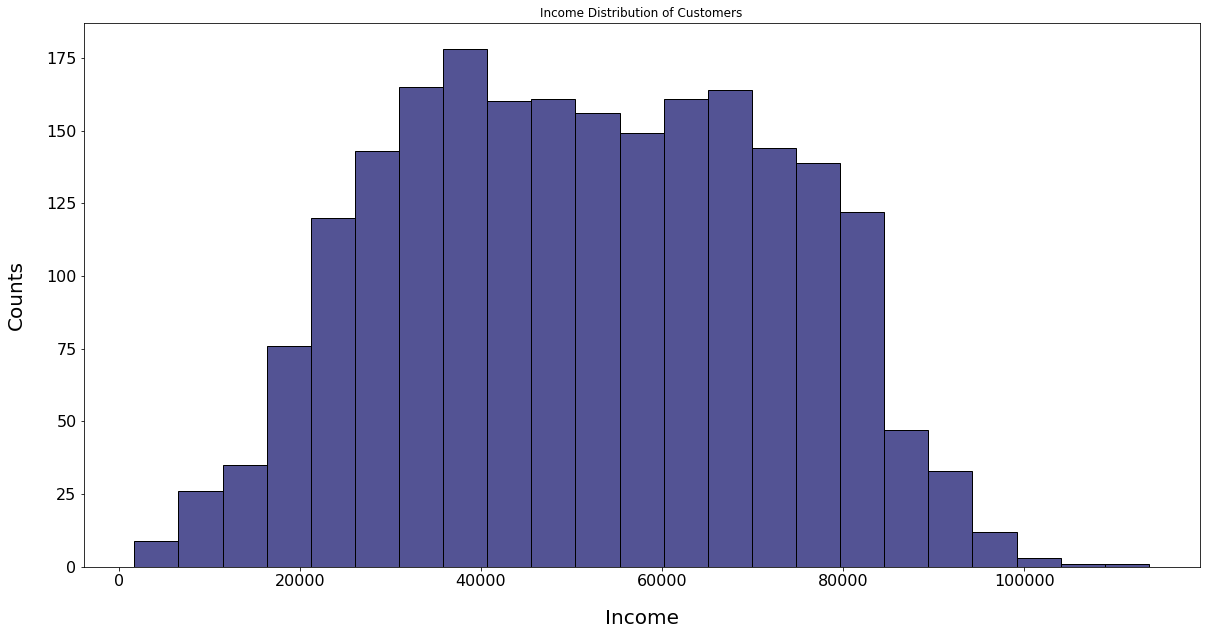

In [75]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

In [76]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,Response,Age,Kids,Parent,Days_Enrolled,Spend_all,CouponsAccepted,NumAllPurchases,AverageCheck,AgeGroup
0,5524,Graduation,Alone,58138.0,04-09-2012,58,635,88,546,172,...,1,58,0,0,971,1617,1,22.0,73.5,"[50, 60]"
1,2174,Graduation,Alone,46344.0,08-03-2014,38,11,1,6,2,...,0,61,2,1,125,27,0,4.0,6.8,"[60, 70]"
2,4141,Graduation,Partner,71613.0,21-08-2013,26,426,49,127,111,...,0,50,0,0,472,776,0,20.0,38.8,"[50, 60]"
3,6182,Graduation,Partner,26646.0,10-02-2014,26,11,4,20,10,...,0,31,1,1,65,53,0,6.0,8.8,"[30, 40]"
4,5324,PhD,Partner,58293.0,19-01-2014,94,173,43,118,46,...,0,34,1,1,321,422,0,14.0,30.1,"[30, 40]"


In [77]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Kids',
       'Parent', 'Days_Enrolled', 'Spend_all', 'CouponsAccepted',
       'NumAllPurchases', 'AverageCheck', 'AgeGroup'],
      dtype='object')

In [78]:
df_for_clustering = df.drop(['ID', 'Education', 'Marital_Status','Income', 'Dt_Customer', 'Recency',
                             'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
                             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                             'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                             'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                             'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Kids',
                             'Parent', 'CouponsAccepted', 'AgeGroup'], axis = 1)

In [79]:
df_for_clustering.head()

,Days_Enrolled,Spend_all,NumAllPurchases,AverageCheck
0,971,1617,22.0,73.5
1,125,27,4.0,6.8
2,472,776,20.0,38.8
3,65,53,6.0,8.8
4,321,422,14.0,30.1


### Підготовка даних перед обученням

In [80]:
#object type to int 
s = (df_for_clustering.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    df_for_clustering[i]=df_for_clustering[[i]].apply(LE.fit_transform)

In [81]:
df_for_clustering.head()

,Days_Enrolled,Spend_all,NumAllPurchases,AverageCheck
0,971,1617,22.0,73.5
1,125,27,4.0,6.8
2,472,776,20.0,38.8
3,65,53,6.0,8.8
4,321,422,14.0,30.1


In [82]:
for i in df_for_clustering.columns:
    df_for_clustering[i] = StandardScaler().fit_transform(np.array(df_for_clustering[[i]]))

In [83]:
df_for_clustering.head()

,Days_Enrolled,Spend_all,NumAllPurchases,AverageCheck
0,1.974128,1.679323,1.314151,1.200586
1,-1.664957,-0.963897,-1.200274,-1.018832
2,-0.172330,0.281242,1.034770,0.045957
3,-1.923048,-0.920675,-0.920893,-0.952282
4,-0.821859,-0.307248,0.196629,-0.243533


### Clustering model

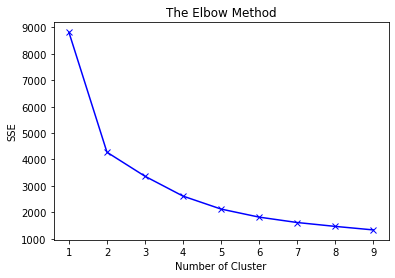

In [84]:
l= []
for x in range(1,10):
    km = KMeans(n_clusters=x, init='k-means++',random_state=42)
    km.fit(df_for_clustering)
    l.append(km.inertia_)
    
plt.plot(range(1,10), l, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [85]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df_for_clustering)
pred = kmeans.predict(df_for_clustering)
df["Cluster"] = pred+1

In [86]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,Age,Kids,Parent,Days_Enrolled,Spend_all,CouponsAccepted,NumAllPurchases,AverageCheck,AgeGroup,Cluster
0,5524,Graduation,Alone,58138.0,04-09-2012,58,635,88,546,172,...,58,0,0,971,1617,1,22.0,73.5,"[50, 60]",3
1,2174,Graduation,Alone,46344.0,08-03-2014,38,11,1,6,2,...,61,2,1,125,27,0,4.0,6.8,"[60, 70]",4
2,4141,Graduation,Partner,71613.0,21-08-2013,26,426,49,127,111,...,50,0,0,472,776,0,20.0,38.8,"[50, 60]",2
3,6182,Graduation,Partner,26646.0,10-02-2014,26,11,4,20,10,...,31,1,1,65,53,0,6.0,8.8,"[30, 40]",4
4,5324,PhD,Partner,58293.0,19-01-2014,94,173,43,118,46,...,34,1,1,321,422,0,14.0,30.1,"[30, 40]",4


In [87]:
df['Cluster'] = np.where(df['Cluster'] == 1, "Cluster 1",
                np.where(df['Cluster'] == 2, "Cluster 2",
                np.where(df['Cluster'] == 3, "Cluster 3","Cluster 4")))

In [88]:
df_Edu = pd.DataFrame(df['Cluster'].value_counts()).reset_index()
df_Edu.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_Edu['Cluster'], values=df_Edu['Count'], hole=.3)])
fig.update_layout(width=800, height=400, title='Cluster')
fig.show()

In [89]:
fig = px.scatter(df, x="Income", y="Spend_all",
                 color="Cluster")

fig.update_layout(
    title="Spend vs Income Plot",
    xaxis_title = "Income",
    yaxis_title = "Spend_all",
    width = 900, height=600
)

fig.show()

In [90]:
df_plot = df[['AgeGroup', 'Cluster', 'ID']].groupby(['AgeGroup', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Number of Customers"}, inplace=True)


fig = px.bar(df_plot, x="AgeGroup", y="Number of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.show()

In [94]:
df_plot = df[['Education', 'Cluster', 'ID']].groupby(['Education', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Education", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.update_layout(title="Education")
fig.show()

In [97]:
df_plot = df[['Marital_Status', 'Cluster', 'ID']].groupby(['Marital_Status', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Marital_Status", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.update_layout(title="Marital_Status")
fig.show()